**About the Problem:** Develop a predictive model that can accurately estimate the market value of a used car based on various factors 

Estimate of its value that can help sellers determine a fair price and buyers make an informed decision.

< y >

Price : The price of the used car in INR Lakhs.

< X >

Name : The brand and model of the car

Location : The location in which the car is being sold or is available for purchase.

Year : The year or edition of the model.

Kilometers_Driven : The total kilometres driven in the car by the previous owner(s) in KM.

Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)

Transmission : The type of transmission used by the car. (Automatic / Manual)

Owner_Type : Whether the ownership is Firsthand, Second hand or other.

Mileage : The standard mileage offered by the car company in kmpl or km/kg

Engine : The displacement volume of the engine in CC.

Power : The maximum power of the engine in bhp.

Seats : The number of seats in the car.

New_Price : The price of a new car of the same model.




In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product
import warnings
warnings.filterwarnings("ignore")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/train-data.csv')

### Explorig the data<a name="subparagraph6"></a>


In [ ]:
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [ ]:
df.shape

(6019, 14)

In [ ]:
df.nunique()

Unnamed: 0           6019
Name                 1876
Location               11
Year                   22
Kilometers_Driven    3093
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               442
Engine                146
Power                 372
Seats                   9
New_Price             540
Price                1373
dtype: int64

In [ ]:
# remove 'Unnamed: 0' in train data

df = df.drop(['Unnamed: 0'], axis=1)
df.head(4)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00


In [ ]:
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


In [ ]:
# remove the unit on Mileage, Engine, and Power

import re

df['Mileage'] = df['Mileage'].map(lambda x: re.sub(r"[^0-9.-]", "", str(x)))
df['Engine'] = df['Engine'].map(lambda x: re.sub(r"[^0-9.-]", "", str(x)))
df['Power'] = df['Power'].map(lambda x: re.sub(r"[^0-9.-]", "", str(x)))


In [ ]:
# from object to numeric data type of Mileage, Engine, Power, and New_Price

df['Mileage'] = pd.to_numeric(df['Mileage'])
df['Engine'] = pd.to_numeric(df['Engine'])
df['Power'] = pd.to_numeric(df['Power'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   float64
 8   Engine             5983 non-null   float64
 9   Power              5876 non-null   float64
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(5), int64(2), object(6)
memory usage: 611.4+ KB


In [ ]:
df.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,6019.000000,6.019000e+03,6017.000000,5983.000000,5876.000000,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,18.134961,1621.276450,113.253050,5.278735,9.479468
std,3.269742,9.126884e+04,4.582289,601.355233,53.874957,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,72.000000,34.200000,0.000000,0.440000
25%,2011.000000,3.400000e+04,15.170000,1198.000000,75.000000,5.000000,3.500000
50%,2014.000000,5.300000e+04,18.150000,1493.000000,97.700000,5.000000,5.640000
75%,2016.000000,7.300000e+04,21.100000,1984.000000,138.100000,5.000000,9.950000
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,160.000000


In [ ]:
df[df.Seats == 0]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
3999,Audi A4 3.2 FSI Tiptronic Quattro,Hyderabad,2012,125000,Petrol,Automatic,First,10.5,3197.0,NaN,0.0,NaN,18.0


In [ ]:
df.Seats = df.Seats.replace(0, np.nan)

In [ ]:
df.Seats.value_counts()

5.0     5014
7.0      674
8.0      134
4.0       99
6.0       31
2.0       16
10.0       5
9.0        3
Name: Seats, dtype: int64

In [ ]:
df[df.Mileage == 0]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,0.0,2179.0,115.0,5.0,NaN,17.50
67,Mercedes-Benz C-Class Progressive C 220d,Coimbatore,2019,15369,Diesel,Automatic,First,0.0,1950.0,194.0,5.0,49.14 Lakh,35.67
79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,1.30
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0,NaN,NaN,NaN,NaN,2.95
229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,0.0,1498.0,99.0,NaN,NaN,3.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5647,Toyota Qualis Fleet A3,Mumbai,2001,227000,Diesel,Manual,Fourth & Above,0.0,2446.0,NaN,8.0,NaN,2.20
5875,Mercedes-Benz C-Class Progressive C 220d,Ahmedabad,2019,4000,Diesel,Automatic,First,0.0,1950.0,194.0,5.0,49.14 Lakh,35.00
5943,Mahindra Jeep MM 540 DP,Chennai,2002,75000,Diesel,Manual,First,0.0,2112.0,NaN,6.0,NaN,1.70
5972,Hyundai Santro Xing GL,Mumbai,2008,65000,Petrol,Manual,Second,0.0,1086.0,62.0,5.0,NaN,1.39


In [ ]:
df.Mileage = df.Mileage.replace(0, np.nan)

#checking outliers

<Axes: >

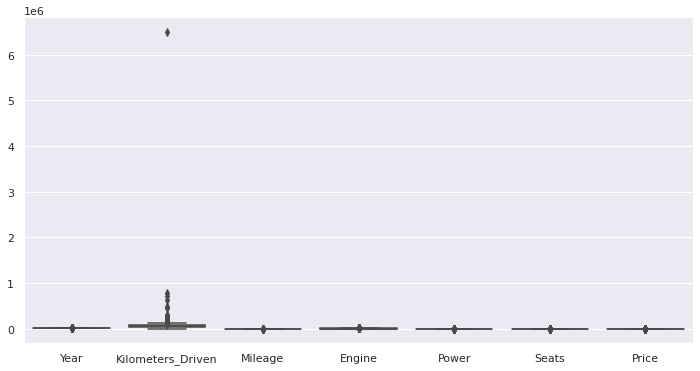

In [ ]:
# Create box plots for each column with increased size
sns.set(rc={'figure.figsize':(12,6)}) # Set the figure size
sns.boxplot(data=df)

Remove outlier in Kilometers_Driven

In [ ]:
# Calculate the first and third quartiles of the Kilometers_Driven
q1 = df['Kilometers_Driven'].quantile(0.25)
q3 = df['Kilometers_Driven'].quantile(0.75)

# Calculate the interquartile range (IQR)
iqr = q3 - q1

# Calculate the lower and upper bounds for outliers
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

# Remove the outliers from the column
df = df[(df['Kilometers_Driven'] >= lower_bound) & (df['Kilometers_Driven'] <= upper_bound)]

### Handling missing values <a name="subparagraph6"></a>


In [ ]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                65
Engine                 35
Power                 135
Seats                  42
New_Price            5005
Price                   0
dtype: int64

In [ ]:
missing_vals = pd.DataFrame(df.isna().sum(), columns=['Sum'])
missing_vals = missing_vals.sort_values(by = ['Sum'], ascending=False)
missing_vals = missing_vals[missing_vals['Sum']>0]  
missing_vals['Percent'] = missing_vals['Sum']/6019*100    #creating another column with percent
missing_vals

,Sum,Percent
New_Price,5005,83.153348
Power,135,2.242897
Mileage,65,1.079914
Seats,42,0.697790
Engine,35,0.581492


In [ ]:
#dropping column wich has 80% or more null values  
df = df.drop(['New_Price'], axis=1)
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65


<Axes: xlabel='Power', ylabel='Count'>

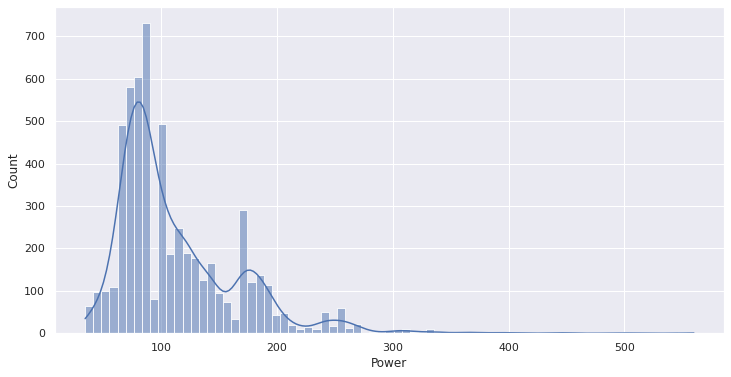

In [ ]:
# plot a histogram plot for Power
sns.histplot(df['Power'], kde=True)

<Axes: xlabel='Mileage', ylabel='Count'>

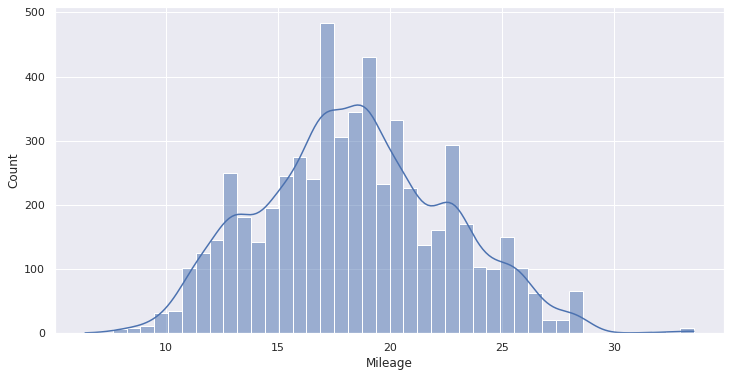

In [ ]:
# plot a histogram plot for Mileage
sns.histplot(df['Mileage'], kde=True)

<Axes: xlabel='Engine', ylabel='Count'>

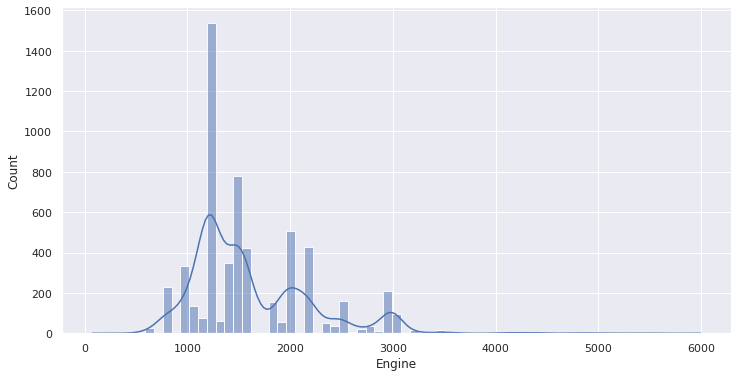

In [ ]:
# plot a histogram plot for Engine
sns.histplot(df['Engine'], kde=True)


<Axes: xlabel='Seats', ylabel='Count'>

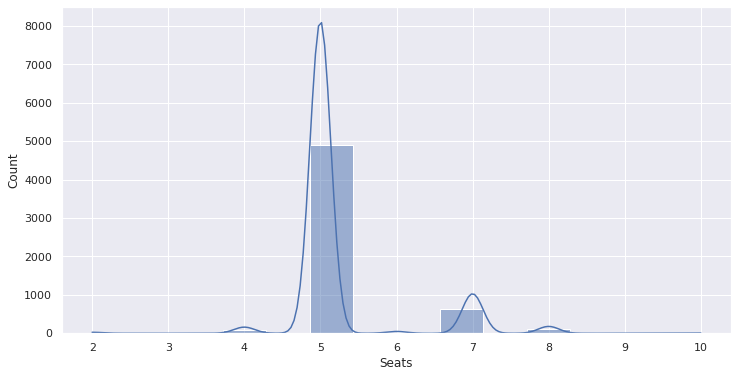

In [ ]:
# plot a histogram plot for Seats
sns.histplot(df['Seats'], kde=True)

In [ ]:
# Calculate the median of each column
col1_median = df['Power'].median()
col2_median = df['Mileage'].median()
col3_median = df['Engine'].median()

# Fill missing values with the median of each column
df['Power'].fillna(col1_median, inplace=True)
df['Mileage'].fillna(col2_median, inplace=True)
df['Engine'].fillna(col3_median, inplace=True)

In [ ]:
col_mode = df['Seats'].mode()
df['Seats'].fillna(col_mode, inplace=True)

In [ ]:
df.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

   yah no more null values

In [ ]:
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65


visualization of Object variables

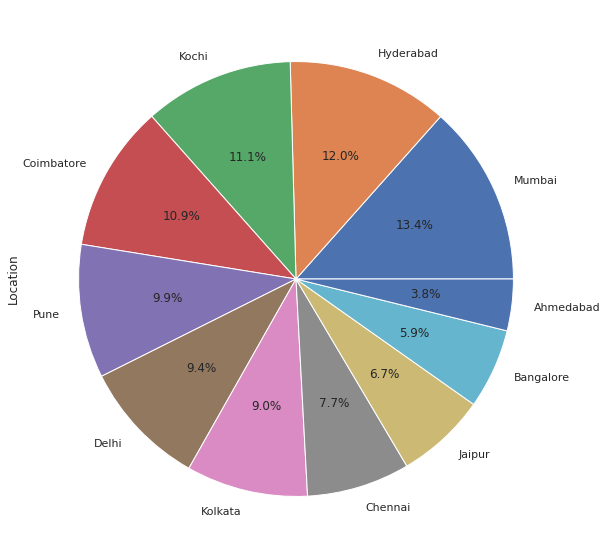

In [ ]:
plt.figure(1, figsize=(10,10))
df['Location'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

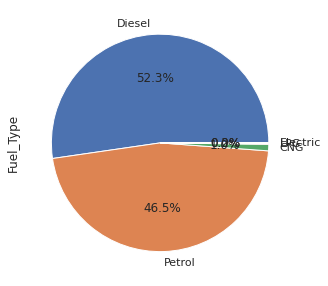

In [ ]:
plt.figure(1, figsize=(5,5))
df['Fuel_Type'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

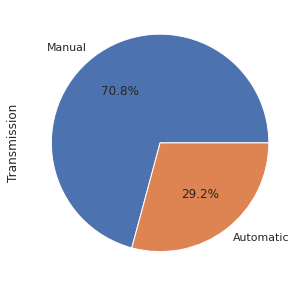

In [ ]:
plt.figure(1, figsize=(5,5))
df['Transmission'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

In [ ]:
df= df.drop(['Name'], axis=1)
df

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...
6014,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75
6015,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00
6016,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90
6017,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65


### Encoding<a name="subparagraph6"></a>


In [ ]:
num_cols=['Kilometers_Driven', 'Mileage', 'Engine', 'Power']
cat_cols=['Location', 'Fuel_Type', 'Transmission', 'Owner_Type']

In [ ]:
df= pd.get_dummies(df, columns=cat_cols)
df

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Ahmedabad,Location_Bangalore,Location_Chennai,...,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,72000,26.60,998.0,58.16,5.0,1.75,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,2015,41000,19.67,1582.0,126.20,5.0,12.50,0,0,0,...,1,0,0,0,0,1,1,0,0,0
2,2011,46000,18.20,1199.0,88.70,5.0,4.50,0,0,1,...,0,0,0,1,0,1,1,0,0,0
3,2012,87000,20.77,1248.0,88.76,7.0,6.00,0,0,1,...,1,0,0,0,0,1,1,0,0,0
4,2013,40670,15.20,1968.0,140.80,5.0,17.74,0,0,0,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,2014,27365,28.40,1248.0,74.00,5.0,4.75,0,0,0,...,1,0,0,0,0,1,1,0,0,0
6015,2015,100000,24.40,1120.0,71.00,5.0,4.00,0,0,0,...,1,0,0,0,0,1,1,0,0,0
6016,2012,55000,14.00,2498.0,112.00,8.0,2.90,0,0,0,...,1,0,0,0,0,1,0,0,1,0
6017,2013,46000,18.90,998.0,67.10,5.0,2.65,0,0,0,...,0,0,0,1,0,1,1,0,0,0


### Scaling <a name="subparagraph6"></a>


In [ ]:
def min_max_scaler(X):
    # Compute the minimum and maximum values of each feature
    min_vals = np.min(X, axis=0)
    max_vals = np.max(X, axis=0)
    
    # Scale the input features to [0, 1] range
    X_scaled = (X - min_vals) / (max_vals - min_vals)
    
    return X_scaled

In [ ]:
#Extract the numerical columns into a NumPy array
X = df[num_cols].values

In [ ]:
X_scaled = min_max_scaler(X)

In [ ]:
#Replace the original columns with the scaled data in order
for i, col in enumerate(num_cols):
   df[col] = X_scaled[:, i]

In [ ]:
df.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Ahmedabad,Location_Bangalore,Location_Chennai,...,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,0.549030,0.744289,0.156261,0.045569,5.0,1.75,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,2015,0.312079,0.488946,0.254809,0.174971,5.0,12.50,0,0,0,...,1,0,0,0,0,1,1,0,0,0
2,2011,0.350297,0.434783,0.190179,0.103652,5.0,4.50,0,0,1,...,0,0,0,1,0,1,1,0,0,0
3,2012,0.663683,0.529477,0.198448,0.103766,7.0,6.00,0,0,1,...,1,0,0,0,0,1,1,0,0,0
4,2013,0.309557,0.324245,0.319946,0.202739,5.0,17.74,0,0,0,...,1,0,0,0,1,0,0,0,1,0


### Train_test_split <a name="subparagraph6"></a>


In [ ]:

def train_test_split(X, y, test_size=0.2, random_state=None):

    
    # Shuffle the data
    if random_state is not None:
        np.random.seed(random_state)
    shuffled_indices = np.random.permutation(len(X))
    X_shuffled = X.iloc[shuffled_indices]
    y_shuffled = y.iloc[shuffled_indices]
    
    # Calculate the number of instances in the test subset
    n_test = int(len(X) * test_size)
    
    # Split the data
    X_train = X_shuffled[:-n_test]
    X_test = X_shuffled[-n_test:]
    y_train = y_shuffled[:-n_test]
    y_test = y_shuffled[-n_test:]
    
    return X_train, X_test, y_train, y_test


In [ ]:
X = df.drop(columns=['Price'], axis=1)
y = df['Price']


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
160,2015,0.326074,0.722181,0.240634,0.122480,5.0,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0
5916,2005,0.380871,0.250553,0.240128,0.113731,5.0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0
1074,2016,0.363146,0.383198,0.240466,0.156143,5.0,0,0,0,0,...,0,0,0,1,1,0,1,0,0,0
1252,2018,0.179952,0.552690,0.189841,0.093001,5.0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0
1779,2014,0.541103,0.320560,0.355552,0.201217,7.0,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0


In [ ]:
y_train.head(10)

160      7.11
5916     0.70
1074     8.73
1252     6.57
1779     7.83
1219    12.50
4995    10.09
4551    17.27
2524     0.95
3988     2.70
Name: Price, dtype: float64

In [ ]:
X_test.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
4723,2013,0.703812,0.600590,0.240634,0.105820,5.0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
5643,2003,0.954139,0.460575,0.156261,0.062571,5.0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
3724,2009,0.403802,0.084746,0.491900,0.361620,5.0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0
1988,2012,0.258574,0.220707,0.355552,0.215500,5.0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0
533,2010,0.526099,0.383198,0.240466,0.159376,5.0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0


In [ ]:
print(X_train.shape)
print( X_test.shape)
print( y_train.shape)
print( y_test.shape)

(4654, 28)
(1163, 28)
(4654,)
(1163,)


### Model Building <a name="subparagraph6"></a>


In [ ]:
class LassoRegression:
    def __init__(self, learning_rate=0.01, max_iter=1000, alpha=1.0, tol=1e-4):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.alpha = alpha
        self.tol = tol
        
    def fit(self, X, y):
        if isinstance(X, pd.DataFrame):
            X = X.values
        if isinstance(y, pd.Series):
            y = y.values
        self.m, self.n = X.shape
        self.W = np.zeros(self.n)
        self.b = 0
        self.cost = np.inf
        for i in range(self.max_iter):
            self.update_weights(X, y)
            y_pred = self.predict(X)
            error = y_pred - y
            cost = (1/(2*self.m)) * np.sum(error**2) + self.alpha * np.sum(np.abs(self.W))
            if abs(cost - self.cost) < self.tol:
                break
            self.cost = cost
        return self
    
    def update_weights(self, X, y):
        y_pred = self.predict(X)
        dW = np.zeros(self.n)
        for j in range(self.n):
            if self.W[j] > 0:
                dW[j] = (-2 * (X[:, j].dot(y - y_pred)) + self.alpha) / self.m
            else:
                dW[j] = (-2 * (X[:, j].dot(y - y_pred)) - self.alpha) / self.m
        db = -2 * np.sum(y - y_pred) / self.m
        self.W -= self.learning_rate * dW
        self.b -= self.learning_rate * db
        
    def predict(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.values
        return X.dot(self.W) + self.b

    
    def set_params(self, **params):
        for parameter, value in params.items():
            setattr(self, parameter, value)
        return self

In [ ]:
# Model training
model = LassoRegression(alpha=0.01,max_iter=10, tol=0.0001)

#Fitting the Training data to the Lasso regressor
model.fit( X_train, y_train )
	
# Prediction on test set
Y_pred = model.predict( X_test )


In [ ]:
Y_pred

array([ 6.31621013, -7.52437576, 21.94092293, ...,  2.60675559,
        2.93038155,  3.39203174])

### Metrics <a name="subparagraph6"></a>


In [ ]:
#function for r_square
def r_squared(y_actual, y_pred):
    residuals = y_actual - y_pred
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y_actual - np.mean(y_actual))**2)
    r2 = 1 - (ss_res / ss_tot)  
    return r2

In [ ]:
# Calculate the R-squared score for the predictions
r2 = r_squared(y_test, Y_pred)
print("R-squared score_before_tuning:", r2)

  

R-squared score_before_tuning: 0.6809054739072239


### Hyperparameter tuning <a name="subparagraph6"></a>


In [ ]:
#Perform grid search to find the best hyperparameters for a given model.
def grid_search(model, param_grid, X_train, y_train, X_test, y_test):

    best_score = 0
    best_params = None
    
    # Loop through all possible combinations of hyperparameters
    for params in get_param_combinations(param_grid):
        # Train the model with the given hyperparameters
        model.set_params(**params)
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        
        # Evaluate the model using score
        score = r_squared(y_train, y_train_pred)
        
        # Update the best hyperparameters if the current score is better
        if score > best_score:
            best_score = score
            best_params = params
    return best_params


def get_param_combinations(param_grid):
  
    # Helper function to generate all possible combinations of hyperparameter values.     
    
    keys = list(param_grid.keys())        # extracts keys as a list
    values = list(param_grid.values())    # extracts values as a list
    for combination in product(*values):
        yield dict(zip(keys, combination))
    # Returns:- A generator that yields dictionaries of hyperparameter values.


In [ ]:
# Define the hyperparameter grid
#param_grid: A dictionary of hyperparameter values to search over.
param_grid = {
    'max_iter': [1000, 5000, 10000],
    'tol': [0.0001, 0.001, 0.01],
    'alpha': [0.1, 0.5, 1.0, 2.0]
}

# Initialize the model
model = model

# Perform grid search
best_params = grid_search(model, param_grid, X_train, y_train, X_test, y_test)

# Print the results
print('Best hyperparameters:', best_params)



Best hyperparameters: {'max_iter': 1000, 'tol': 0.0001, 'alpha': 0.1}


In [ ]:
# Model training
model = LassoRegression(max_iter=1000, tol= 0.0001, alpha= 0.1)

#Fitting the Training data to the Lasso regressor
model.fit( X_train, y_train )
	
# Prediction on test set
Y_pred1 = model.predict( X_test )


In [ ]:
# Calculate the R-squared score for the predictions
r2_tuned = r_squared(y_test, Y_pred1)

In [ ]:
print("R-squared score_before_tuning:", r2)
print("R-squared score_after_tuning:", r2_tuned)

R-squared score_before_tuning: 0.6809054739072239
R-squared score_after_tuning: 0.7003801749913846
